## Investment Portfolio Analysis, Part 2
### 3.5. Assets and Market Relationship (Systematic Risk)

In [3]:
#Load Packages

# 1.1. Load R packages 
library("tseries")
library("quantmod")
library("Quandl")
library("PortfolioAnalytics")
library("DEoptim")

# 1.2. Data Reading
data <- read.csv("Investment-Portfolio-Analysis-Data.txt",header=T)
data <- xts(data[,2:30],order.by=as.Date(data[,1]))
head(data)

            mcash   mbonds  msbonds  mlbonds  mibonds  mstocks mlstocks
2007-01-31 109.00 7.160662 8.528708 6.476980 7.589386 29.04660 109.4419
2007-02-28 109.12 7.268778 8.608584 6.666734 7.758039 28.57824 107.2868
2007-03-31 109.28 7.270352 8.632868 6.591707 7.782285 28.89504 108.4799
2007-04-30 109.40 7.307607 8.673239 6.648708 7.870720 30.05387 113.2724
2007-05-31 109.58 7.250820 8.638874 6.520618 7.730698 31.16231 117.2110
2007-06-30 109.64 7.223215 8.670263 6.463231 7.689753 30.64043 115.2484
           msstocks mgstocks mvstocks mistocks mdstocks mestocks  moil mgold
2007-01-31 29.46211 17.77470 14.38522 13.79684 33.95412 19.32504 48.24 64.83
2007-02-28 29.42683 17.84074 14.30250 13.80458 34.06837 19.07677 51.18 66.48
2007-03-31 29.78501 18.16343 14.38777 14.19126 35.01281 19.86162 53.35 65.74
2007-04-30 30.57905 18.80505 14.65268 14.74808 36.38494 20.70254 51.24 67.09
2007-05-31 31.92890 19.76747 15.19077 15.20437 37.19434 21.93588 48.96 65.54
2007-06-30 31.41719 19.62594 14.80

In [5]:
#  U.S. Total Money Market
cash <- data[,1]
mcash <- monthlyReturn(cash,type="arithmetic") ##create monthly return column
colnames(mcash) <- "mcash"
# U.S. Total Bond Market
bonds <- data[,2]
mbonds <- monthlyReturn(bonds,type="arithmetic")       ##create monthly return column
colnames(mbonds) <- "mbonds"

# U.S. Short Term Bond Market 
sbonds <- data[,3]
msbonds <- monthlyReturn(sbonds,type="arithmetic")     ##create monthly return column
colnames(msbonds) <- "msbonds"

# U.S. Long Term Bond Market 
lbonds <- data[,4]
mlbonds <- monthlyReturn(lbonds,type="arithmetic")    ##create monthly return column
colnames(mlbonds) <- "mlbonds"

# International Total Bond Market 
ibonds <- data[,5]
mibonds <- monthlyReturn(ibonds,type="arithmetic")    ##create monthly return column
colnames(mibonds) <- "mibonds"
# U.S. Total Stock Market
stocks <- data[,6]
mstocks <- monthlyReturn(stocks,type="arithmetic")   ##create monthly return column
colnames(mstocks) <- "mstocks"

# U.S. Large Cap Stock Market
lstocks <- data[,7]
mlstocks <- monthlyReturn(lstocks,type="arithmetic")    ##create monthly return column
colnames(mlstocks) <- "mlstocks"

# U.S. Small Cap Stock Market 
sstocks <- data[,8]
msstocks <- monthlyReturn(sstocks,type="arithmetic")    ##create monthly return column
colnames(msstocks) <- "msstocks"

#  U.S. Small Cap Growth Stock Market
gstocks <- data[,9]
mgstocks <- monthlyReturn(gstocks,type="arithmetic")    ##create monthly return column
colnames(mgstocks) <- "mgstocks"

# U.S. Small Cap Value Stock Market 
vstocks <- data[,10]
mvstocks <- monthlyReturn(vstocks,type="arithmetic")    ##create monthly return column
colnames(mvstocks) <- "mvstocks"

# International Total Stock Market
istocks <- data[,11]
mistocks <- monthlyReturn(istocks,type="arithmetic")     ##create monthly return column
colnames(mistocks) <- "mistocks"

#  International Developed Stock Market 
dstocks <- data[,12]
mdstocks <- monthlyReturn(dstocks,type="arithmetic")    ##create monthly return column
colnames(mdstocks) <- "mdstocks"

# International Emerging Stock Market 
estocks <- data[,13]
mestocks <- monthlyReturn(estocks,type="arithmetic")    ##create monthly return column
colnames(mestocks) <- "mestocks"
#  United States Oil Fund
oil <- data[,14]
moil <- monthlyReturn(oil,type="arithmetic")
colnames(moil) <- "moil"

# U.S. Real Estate Investment Trust
reit <- data[,16]
mreit <- monthlyReturn(reit,type="arithmetic")     #REIT shouldn't be here, but it is
colnames(mreit) <- "mreit"


# USD Major Currencies Index 
usd <- data[,17]
musd <- monthlyReturn(usd,type="arithmetic")   #Currency shouldn't be here, but it is
colnames(musd) <- "musd"


#  Gold Shares
gold <- data[,15]
mgold <- monthlyReturn(gold,type="arithmetic")
colnames(mgold) <- "mgold"

In [6]:
# Assets Pricing Models Data
cpi <- data[,24]
mcpi <- monthlyReturn(cpi)
colnames(mcpi) <- "mcpi"
mmom <- data[,19]/100
msprem <- data[,20]/100
msize <- data[,21]/100
mstyle <- data[,22]/100
mrisk <- data[,23]/100
mlsprem <- mlstocks-mrisk

#### 1. Capital Asset Pricing Model CAPM 

In [7]:
# CAPM Regression
mregc <- lm(mlsprem~msprem)
summary(mregc)

# CAPM Beta Coefficient
mbcapm <- CAPM.beta(Ra=mlstocks,Rb=msprem+mrisk,Rf=mrisk)
mbcapm


# CAPM Jensen's Alpha Intercept
macapm <- CAPM.alpha(Ra=mlstocks,Rb=msprem+mrisk,Rf=mrisk)
macapm


# CAPM Expected Returns
mcapm <- mean(mrisk)+mbcapm*(mean(msprem))
mcapm

# CAPM Residual Variance (Unsystematic Risk)
mresvarc <- summary(mregc)$sigma
mresvarc


Call:
lm(formula = mlsprem ~ msprem)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0175619 -0.0022127 -0.0000378  0.0029174  0.0095260 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.0004392  0.0003776  -1.163    0.247    
msprem       0.9715098  0.0082807 117.322   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.004096 on 118 degrees of freedom
Multiple R-squared:  0.9915,	Adjusted R-squared:  0.9914 
F-statistic: 1.376e+04 on 1 and 118 DF,  p-value: < 2.2e-16


[1] 0.9715098

[1] -0.000439218

[1] 0.006728135

[1] 0.004095749

#### 2. Fama-French-Carhart Factor Models

In [8]:
# Fama-French-Carhart Regression
mfactf <- cbind(msprem,msize,mstyle,mmom) 
mregf <- lm(mlsprem~mfactf)
summary(mregf)

# Fama-French-Carhart Beta Coefficients
msprembf <- summary(mregf)$coefficients[2]
msizeb <- summary(mregf)$coefficients[3]
mstyleb <- summary(mregf)$coefficients[4]
mmomb <- summary(mregf)$coefficients[5]
mbffc <- cbind(msprembf,msizeb,mstyleb,mmomb)
mbffc

# Fama-French-Carhart Alpha Intercept
maffc <- summary(mregf)$coefficients[1]
maffc

# Fama-French-Carhart Expected Returns
mffc <- mean(mrisk)+maffc+msprembf*mean(msprem)+msizeb*mean(msize)+mstyleb*mean(mstyle)+mmomb*mean(mmom) 
mffc

# Fama-French-Carhart Residual Variance (Unsystematic Risk)
mresvarf <- summary(mregf)$sigma
mresvarf


Call:
lm(formula = mlsprem ~ mfactf)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0178214 -0.0011303  0.0003132  0.0014670  0.0058944 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.0004045  0.0002475  -1.634    0.105    
mfactfmsprem  0.9982006  0.0062669 159.281   <2e-16 ***
mfactfmsize  -0.1472935  0.0116062 -12.691   <2e-16 ***
mfactfmstyle  0.0065011  0.0101731   0.639    0.524    
mfactfmmom    0.0028512  0.0056287   0.507    0.613    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.002676 on 115 degrees of freedom
Multiple R-squared:  0.9965,	Adjusted R-squared:  0.9963 
F-statistic:  8100 on 4 and 115 DF,  p-value: < 2.2e-16


msprembf,msizeb,mstyleb,mmomb
0.9982006,-0.1472935,0.006501062,0.002851229


[1] -0.0004045216

[1] 0.006288917

[1] 0.002676191

#### 3. Arbitrage Pricing Theory Model APT

In [9]:
# Arbitrage Pricing Theory Regression
mfacta <- cbind(msprem,mcpi) 
mrega <- lm(mlsprem~mfacta)
summary(mrega)

# Arbitrage Pricing Theory Coefficients
mspremba <- mrega$coefficients[2]
mcpib <- mrega$coefficients[3]
mbapt <- cbind(mspremba,mcpib)
mbapt

# Arbitrage Pricing Theory Alpha Intercept
maapt <- mrega$coefficients[1]
maapt

# Arbitrage Pricing Theory Expected Returns
mapt <- mean(mrisk)+maapt+mspremba*mean(msprem)+mcpib*mean(mcpi) 
names(mapt) <- "mapt"
mapt

# Arbitrage Pricing Theory Residual Variance (Unsystematic Risk)
mresvara <- summary(mrega)$sigma
mresvara


Call:
lm(formula = mlsprem ~ mfacta)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0177277 -0.0022935 -0.0000504  0.0028616  0.0095993 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.0002876  0.0004140  -0.695    0.489    
mfactamsprem  0.9725203  0.0083639 116.276   <2e-16 ***
mfactamcpi   -0.1067524  0.1190484  -0.897    0.372    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.004099 on 117 degrees of freedom
Multiple R-squared:  0.9916,	Adjusted R-squared:  0.9914 
F-statistic:  6871 on 2 and 117 DF,  p-value: < 2.2e-16


,mspremba,mcpib
mfactamsprem,0.9725203,-0.1067524


(Intercept) 
-0.0002875527

mapt 
0.006288917

[1] 0.004099153

In [12]:
# Expected Returns Third Comparison
retcomp3 <- cbind(mmean,mmed,mgmean,mcapm,mffc,mapt)
retcomp3

# Excess Returns Comparison
eretcomp <- cbind(macapm,maffc,maapt)
eretcomp

# Residual Variance Comparison (Unsystematic Risk)
resvarcomp <- cbind(mresvarc,mresvarf,mresvara)
resvarcomp

,macapm,maffc,maapt
(Intercept),-0.000439218,-0.0004045216,-0.0002875527


mresvarc,mresvarf,mresvara
0.004095749,0.002676191,0.004099153


### Systematic Risk Hedge

#### 1) Put Call Parity

,mstocks2,mparity
Annualized Return,0.0729,0.0602
Annualized Std Dev,0.1566,0.1345
Annualized Sharpe (Rf=0%),0.4652,0.4474


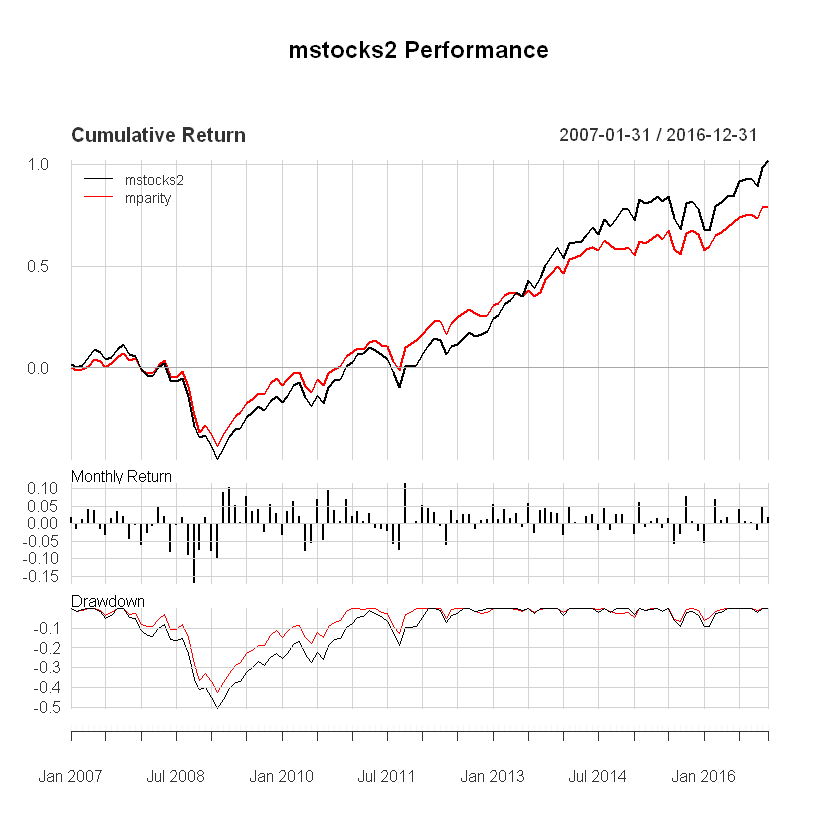

In [13]:
# CBOE BXM Index 
parity <- data[,25]
mparity <- monthlyReturn(parity)
colnames(mparity) <- "mparity"

# Put Call Parity Comparison
mstocks2 <- msprem+mrisk
colnames(mstocks2) <- "mstocks2"
paritycomp <- cbind(mstocks2, mparity)
table.AnnualizedReturns(paritycomp)
charts.PerformanceSummary(paritycomp)

#### 2) Tail Risk Hedge 

,mstocks2,mtail
Annualized Return,0.0729,0.0577
Annualized Std Dev,0.1566,0.1283
Annualized Sharpe (Rf=0%),0.4652,0.4494


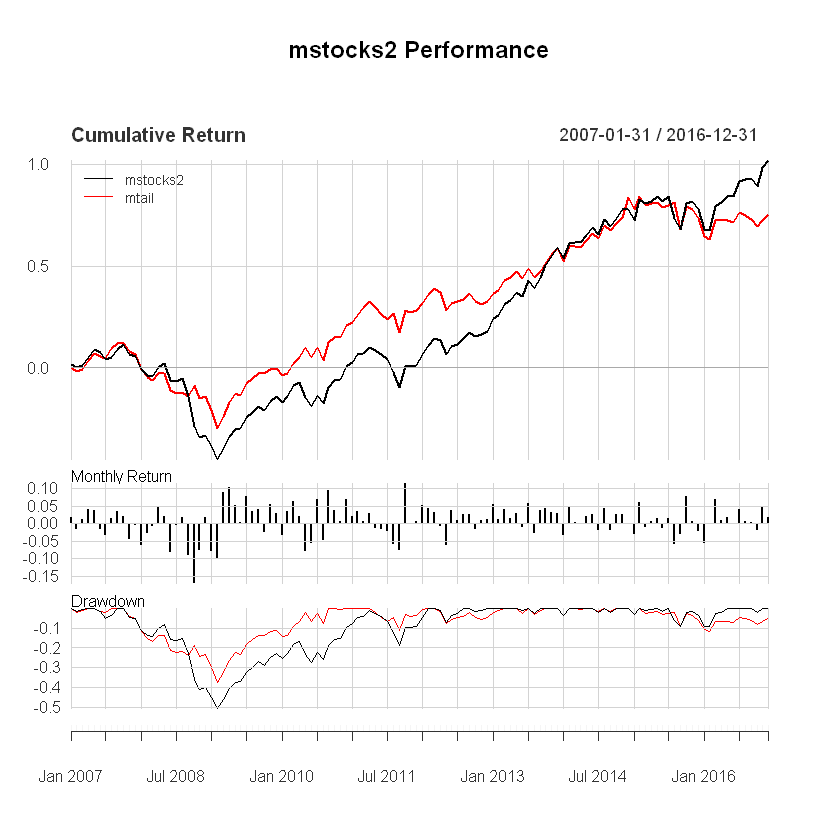

In [14]:
# CBOE VXTH Index 
tail <- data[,26]
mtail <- monthlyReturn(tail)
colnames(mtail) <- "mtail"

# Tail Risk Comparison
tailcomp <- cbind(mstocks2, mtail)
table.AnnualizedReturns(tailcomp)
charts.PerformanceSummary(tailcomp)

,mlstocks,mhedge
Annualized Return,0.0656,0.0599
Annualized Std Dev,0.1528,0.0503
Annualized Sharpe (Rf=0%),0.4293,1.1904


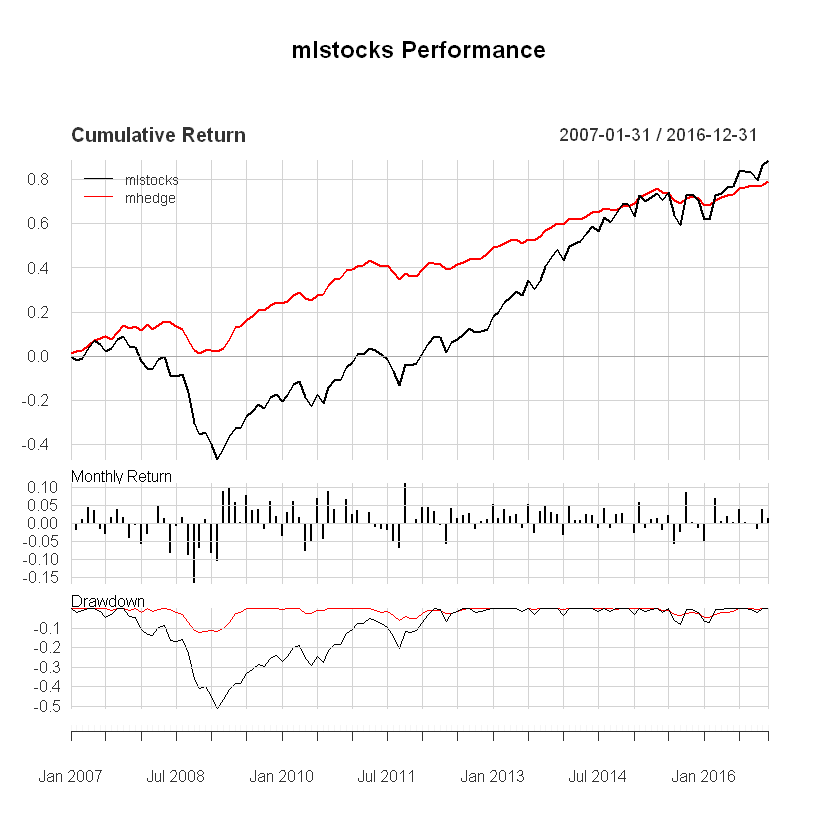

In [15]:
# Eureka Equal Weighted Hedge Fund Index

hfr <- data[,27]
mhedge <- hfr/100
colnames(mhedge) <- "mhedge"

# Hedge Funds Comparison
hedgecomp <- cbind(mlstocks, mhedge)
table.AnnualizedReturns(hedgecomp)
charts.PerformanceSummary(hedgecomp)